In [137]:
import torch
import spacy
import json
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from summarizer import Summarizer
from rouge_score import rouge_scorer
from IPython.display import display, clear_output

In [148]:
array([1,2,4])

array([1, 2, 4])

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
BERT_summarize = Summarizer()

/Users/yangchangmao/Library/Python/3.9/lib/python/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [4]:
df = pd.read_csv('dat/cnn_dailymail_test.csv')

In [102]:
def calculate_rouge_scores(reference_text, generated_text):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_text, generated_text)
    rouge_1 = scores['rouge1'].fmeasure
    rouge_2 = scores['rouge2'].fmeasure
    rouge_L = scores['rougeL'].fmeasure
    return rouge_1, rouge_2, rouge_L

# BERT summarize testing

**Following is testing for article summairze by BERT and do ROUGE**

In [117]:
from numpy.random import random
from numpy import exp,array

KeyboardInterrupt: 

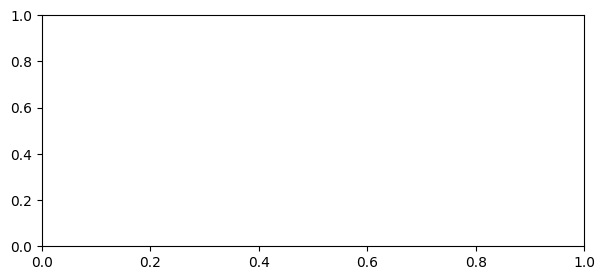

In [143]:
cnn_ids = df['id']
cnn_articles = df['article']
cnn_higlights = df['highlights']

ERROR_index = []

bert_summarized_articles = {}
rouge_bert_summarized_articles = {}

fig = plt.figure(figsize = (7,3))
ax = fig.subplots()
max_num = 100
# ---
max_width_num_sents = 3
_rouges = []
for i in range(max_num):
    try:
        cnn_id = cnn_ids[i]
        cnn_article = cnn_articles[i]
        cnn_higlight = cnn_higlights[i]
        goal_num_sents = len(list(nlp(cnn_higlight).sents))
        width_num_sents = min(goal_num_sents - 1, max_width_num_sents)
        # ---
        bert_summarized_article_dict = {}
        rouge_bert_summarized_article_dict = {}
        
        _rouge = []
        for num_sent in range(goal_num_sents - width_num_sents, int(goal_num_sents + width_num_sents+1)):
            # ---
            bert_summarized_article = BERT_summarize(cnn_article, num_sentences=num_sent)
            bert_summarized_article_dict[num_sent] = bert_summarized_article
            # ---
            rouge_bert_summarized_article = calculate_rouge_scores(cnn_higlight, bert_summarized_article) 
            rouge_bert_summarized_article_dict[num_sent] = rouge_bert_summarized_article
            # rouge_bert_summarized_article = [exp(-0.2*(num_sent - width_num_sents-1)**2) + 0.2*random()]
            # time.sleep(0.1)
            # ---
            for all_rouge in _rouges:
                len_rouge = len(all_rouge)
                ax.plot(range(-int(len_rouge/2),-int(len_rouge/2)+len_rouge), all_rouge,
                        '-o', markersize=1, linewidth=0.8, color= 'red', alpha=min(1.0, 10/i))
            # ---
            _rouge.append(rouge_bert_summarized_article[0])
            ax.plot(range(-width_num_sents,-width_num_sents+num_sent), _rouge, '-o', linewidth=1, color= 'blue', alpha=1)
            ax.axvline(x=0, color='gray')
            ax.set_yticks([])
            ax.set_xticks([])
            display(plt.gcf())
            plt.cla()
            print(f'Process num: {i+1}/{max_num}')
            clear_output(wait=True)
            # ---
        _rouges.append(_rouge)
        # ---
        bert_summarized_articles[cnn_id] = (bert_summarized_article_dict)
        rouge_bert_summarized_articles[cnn_id] = (rouge_bert_summarized_article_dict)
    except Exception as e:
        ERROR_index.append(i)
        print(f"Error in {i}: {e}")

print('Calculate complete!')

for _rouge in _rouges:
    len_rouge = len(_rouge)
    ax.plot(range(-int(len_rouge/2),-int(len_rouge/2)+len_rouge), _rouge,
            '-o', markersize=1, linewidth=0.8, color= 'red', alpha=min(1.0, 10/(max_num-1)))

with open('./dat/cnn_dailymail_test-BERT.json', 'w', encoding='utf-8') as f:
    json.dump(bert_summarized_articles, f, ensure_ascii=False, indent=1)

with open('./dat/cnn_dailymail_test-BERT-rouge_scores.json', 'w', encoding='utf-8') as f:
    json.dump(rouge_bert_summarized_articles, f, ensure_ascii=False, indent=1)

print("Write to file complete!")

In [145]:
# with open('./dat/cnn_dailymail_test-BERT.json', 'w', encoding='utf-8') as f:
#     json.dump(bert_summarized_articles, f, ensure_ascii=False, indent=1)

# with open('./dat/cnn_dailymail_test-BERT-rouge_scores.json', 'w', encoding='utf-8') as f:
#     json.dump(rouge_bert_summarized_articles, f, ensure_ascii=False, indent=1)